In [2]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib widget
%matplotlib inline

import pandas as pd
from rdkit.Chem import AllChem, MolFromSmiles
from rdkit.Chem.SaltRemover import SaltRemover
from rdkit.Chem import DataStructs
from rdkit import Chem
from rxnfp.tokenization import get_default_tokenizer, SmilesTokenizer
from rdkit.Chem import rdChemReactions

['Cl', 'C', '1', '=', 'C', 'C', '=', 'C', '(', 'O', 'C', ')', 'C', '=', 'C', '1', '.', 'O', 'B', '(', 'O', ')', 'C', '1', '=', 'C', 'C', '=', 'C', 'C', '=', 'C', '1', '>>', 'C', 'O', 'C', '(', 'C', '=', 'C', '1', ')', '=', 'C', 'C', '=', 'C', '1', 'C', '2', '=', 'C', 'C', '=', 'C', 'C', '=', 'C', '2']


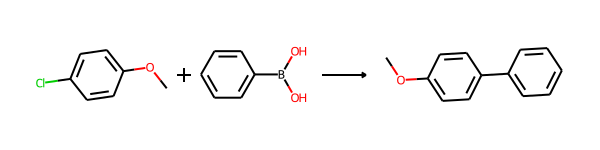

In [3]:
from rxnfp.tokenization import get_default_tokenizer, SmilesTokenizer
from rdkit.Chem import rdChemReactions
from rdkit.Chem import Draw

smiles_tokenizer = get_default_tokenizer()

reaction_smiles = 'ClC1=CC=C(OC)C=C1.OB(O)C1=CC=CC=C1>>COC(C=C1)=CC=C1C2=CC=CC=C2'
rxn = rdChemReactions.ReactionFromSmarts(reaction_smiles,useSmiles=True)

print(smiles_tokenizer.tokenize(reaction_smiles))
rxn

In [4]:
#from rxn_yields.data import generate_buchwald_hartwig_rxns
#df = pd.read_excel('../data/Buchwald-Hartwig/Dreher_and_Doyle_input_data.xlsx', sheet_name='FullCV_01')
df_origin = pd.read_excel('smc_data_catagorized.xlsx', sheet_name='Vbur_min32_x197')
df_origin = df_origin.sample(frac=1,random_state=42)
df_x = df_origin.drop(columns = ['ID.1','Unnamed: 0','y1','y2','y3','y4'])
df_x = df_x.drop(columns = ['y5','y6','y7','y8','y9','y10','y11','y12'])
df_x = df_x.drop(columns = ['y13','y14','y15','y16','y17','y18','y19','buch'])
#df_x = df_x.drop(columns = ['x198','x199','x200','x201','x202','Unnamed: 110'])
df_y = df_origin[['x198']]

In [5]:
df_x

,SMILES,ID,x1,x2,x3,x4,x5,x6,x7,x8,...,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202
0,c1ccc(-c2ccccc2P(C2CCCCC2)C2CCCCC2)cc1,5,-0.061351,1.816461,-0.218842,-0.030145,-0.124494,0.188697,0.041069,0.060353,...,1212.983056,196.1,166.5,47.5,31.8,67,3,9,89,100
5,CP(C)C,22,-0.060570,1.820162,-0.235270,0.041670,-0.096800,0.276940,0.016917,0.135840,...,0.644472,115.1,114.9,22.1,22.1,8,0,3,25,9
46,c1ccc(-c2nn(-c3ccccc3)c(-c3ccccc3)c2-n2nccc2P(...,327,-0.054418,1.817123,-0.228504,-0.049092,-0.138798,0.179412,0.053695,0.028506,...,4021.076111,214.2,173.5,55.3,30.1,4,0,1,44,3
31,CC(C)c1cc(C(C)C)c(-c2cc(-c3c(C(C)C)cc(C(C)C)cc...,186,-0.051495,1.845024,-0.222918,-0.030805,-0.126862,0.192113,0.041900,0.034454,...,25559.593250,227.0,214.1,27.7,26.9,28,7,3,55,23
13,Fc1cccc(P(c2cccc(F)c2)c2cccc(F)c2)c1,133,-0.035197,1.880154,-0.244210,-0.045672,-0.144941,0.198538,0.052907,0.044706,...,167.400861,158.7,158.0,28.2,28.1,15,0,6,50,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,Cc1ccccc1-c1ccccc1P(C1CCCCC1)C1CCCCC1,277,-0.059598,1.830491,-0.220462,-0.024266,-0.122364,0.196197,0.038170,0.065071,...,1438.418917,201.8,166.7,51.3,31.5,9,2,3,59,6
14,N#CCCP(CCC#N)CCC#N,137,-0.029256,1.880657,-0.270677,-0.010491,-0.140584,0.260186,0.037995,0.085784,...,187.687361,170.7,153.6,32.4,26.0,0,0,0,1,0
28,CC(C)(C)c1cc(P(c2cc(C(C)(C)C)cc(C(C)(C)C)c2)[C...,182,-0.054432,1.823233,-0.222060,-0.021049,-0.121555,0.201011,0.036760,0.056209,...,3071.949944,183.1,175.2,31.7,27.5,78,35,39,86,43
51,Cc1cc(C)cc(P(c2cc(C)cc(C)c2)c2ccccc2C=O)c1,608,-0.043693,1.865147,-0.229987,-0.070578,-0.150282,0.159409,0.070844,0.029648,...,103.359417,175.7,166.7,31.2,31.1,0,0,0,12,1


In [6]:
def plot_three_features(df_x,i,j,k):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    n=100
    ax.scatter(df_x[i],df_x[j],df_x[k],color="red")
    ax.set_xlabel(i)
    ax.set_ylabel(j)
    ax.set_zlabel(k)
    print("A plot of axis:",i, j, ", and ",k)
    plt.show()

In [7]:
list_features_area1 = []
list_features_area2 = []
list_features_less_than_1 = []
list_features_between_1_2_closeto1 = []
list_features_between_1_2_closeto2 = []
list_features_more_than_2 = []
for i in df_x['x4']:
    if -0.03<i<-0.015:
        list_features_area1.append(i)
    elif 0.03<i<0.04:
        list_features_area2.append(i)
    elif i<-0.03:
        list_features_less_than_1.append(i)
    elif -0.015<i<0.00:
        list_features_between_1_2_closeto1.append(i)
    elif 0.00<i<0.03:
        list_features_between_1_2_closeto2.append(i)
    elif 0.04<i:
        list_features_more_than_2.append(i)
    else:
        print(i,'element is not classified')
        
df_threshold_x4_area1 = pd.DataFrame({'x4':list_features_area1})
df_threshold_x4_area2 = pd.DataFrame({'x4':list_features_area2})
df_before_threshold_x4_area1 = pd.DataFrame({'x4':list_features_less_than_1})
df_between_threshold_x4_closeto1 = pd.DataFrame({'x4':list_features_between_1_2_closeto1})
df_between_threshold_x4_closeto2 = pd.DataFrame({'x4':list_features_between_1_2_closeto2})
df_after_threshold_x4_area2 = pd.DataFrame({'x4':list_features_more_than_2})

In [8]:
df_threshold_x4_area1 = df_x.loc[df_x['x4'].isin(df_threshold_x4_area1['x4'])]
df_threshold_x4_area2= df_x.loc[df_x['x4'].isin(df_threshold_x4_area2['x4'])]
df_before_threshold_x4_area1= df_x.loc[df_x['x4'].isin(df_before_threshold_x4_area1['x4'])]
df_between_threshold_x4_closeto1= df_x.loc[df_x['x4'].isin(df_between_threshold_x4_closeto1['x4'])]
df_between_threshold_x4_closeto2= df_x.loc[df_x['x4'].isin(df_between_threshold_x4_closeto2['x4'])]
df_after_threshold_x4_area2= df_x.loc[df_x['x4'].isin(df_after_threshold_x4_area2['x4'])]

c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\rdkit\Chem\PandasTools.py:452: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


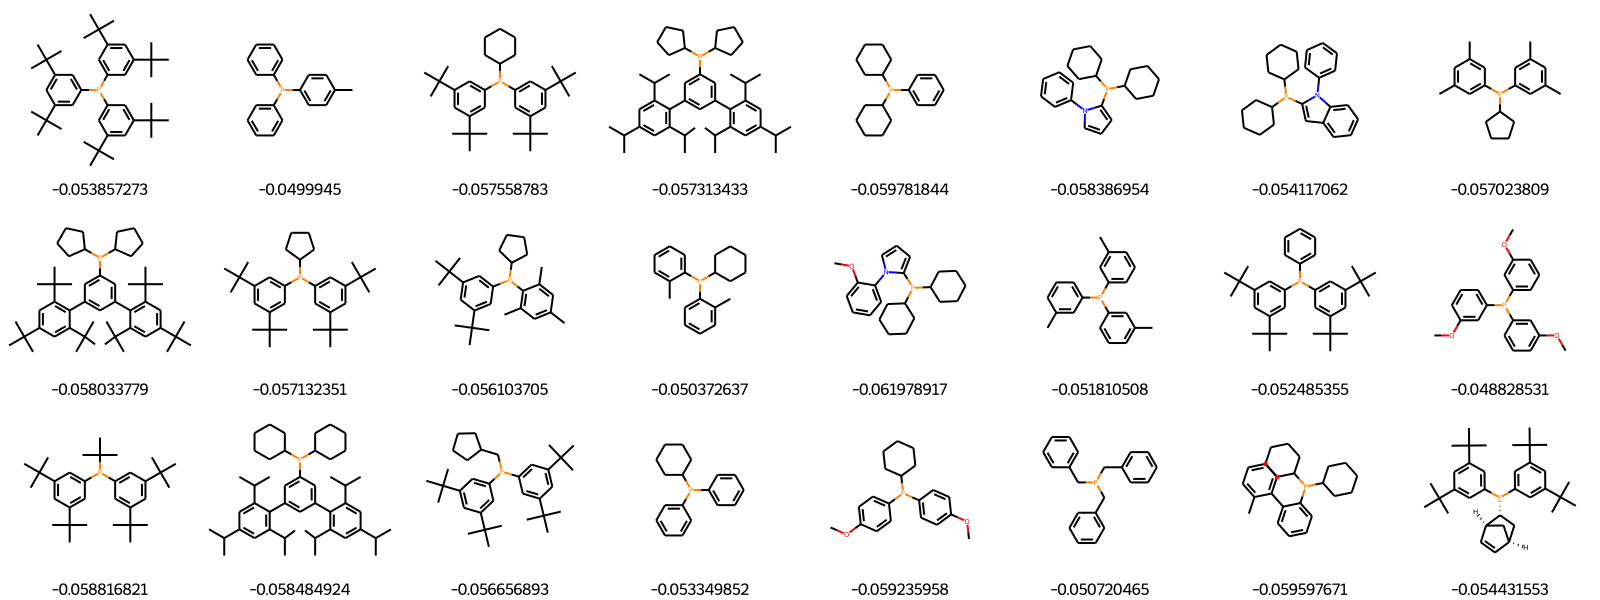

In [10]:
import pandas as pd
from rdkit.Chem import PandasTools

#mols = [Chem.MolFromSmiles(smi) for smi in df_dft_selected2['SMILES']]
#Draw.MolsToGridImage(mols, molsPerRow=8, legendsCol='x198',subImgSize=(200, 200))
PandasTools.AddMoleculeColumnToFrame(df_threshold_x4_area1, smilesCol='SMILES')
PandasTools.FrameToGridImage(df_threshold_x4_area1, legendsCol="x1", molsPerRow=8)

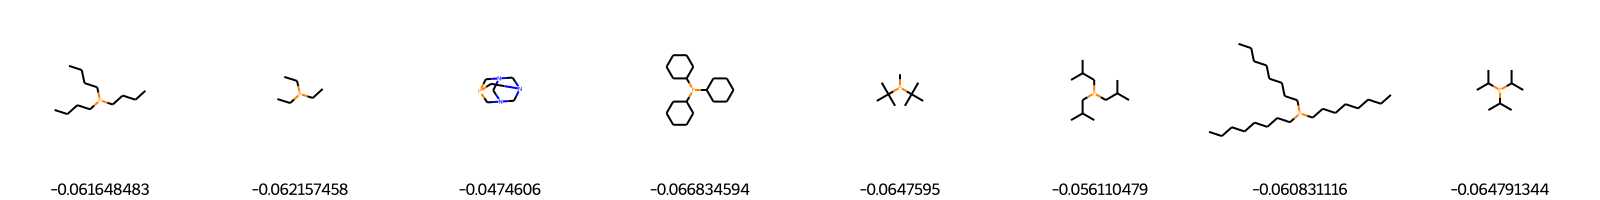

In [11]:
PandasTools.AddMoleculeColumnToFrame(df_threshold_x4_area2, smilesCol='SMILES')
PandasTools.FrameToGridImage(df_threshold_x4_area2, legendsCol="x1", molsPerRow=8)

In [ ]:
df_threshold_x4_area2.to_excel('output.xlsx')

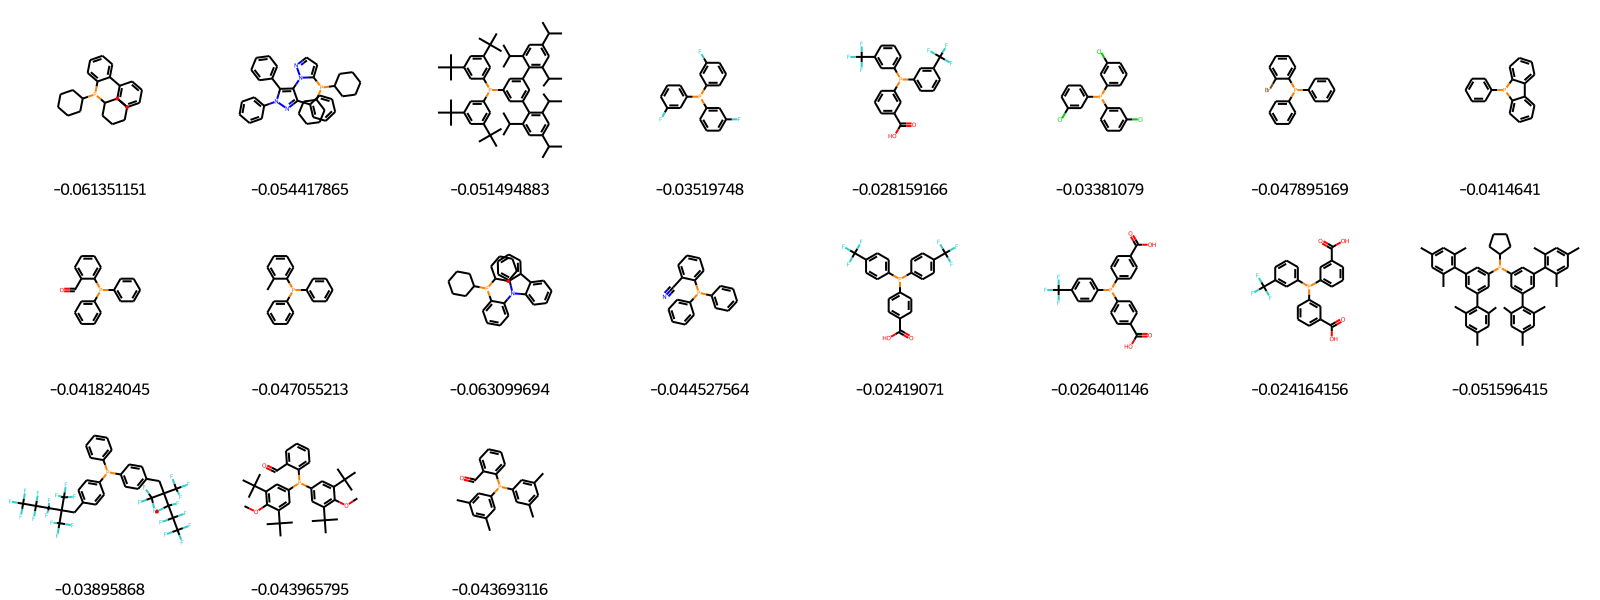

In [12]:
PandasTools.AddMoleculeColumnToFrame(df_before_threshold_x4_area1, smilesCol='SMILES')
PandasTools.FrameToGridImage(df_before_threshold_x4_area1, legendsCol="x1", molsPerRow=8)

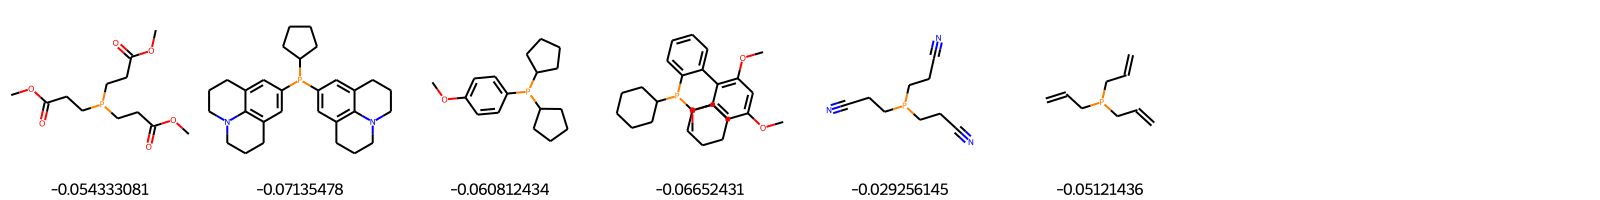

In [13]:
PandasTools.AddMoleculeColumnToFrame(df_between_threshold_x4_closeto1, smilesCol='SMILES')
PandasTools.FrameToGridImage(df_between_threshold_x4_closeto1, legendsCol="x1", molsPerRow=8)

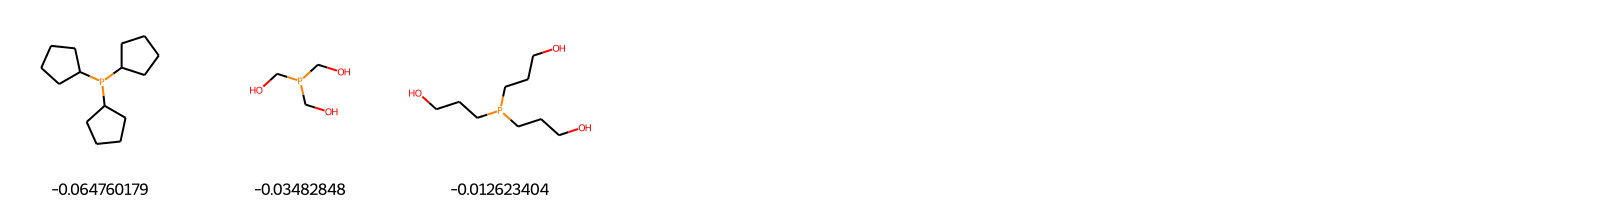

In [14]:
PandasTools.AddMoleculeColumnToFrame(df_between_threshold_x4_closeto2, smilesCol='SMILES')
PandasTools.FrameToGridImage(df_between_threshold_x4_closeto2, legendsCol="x1", molsPerRow=8)

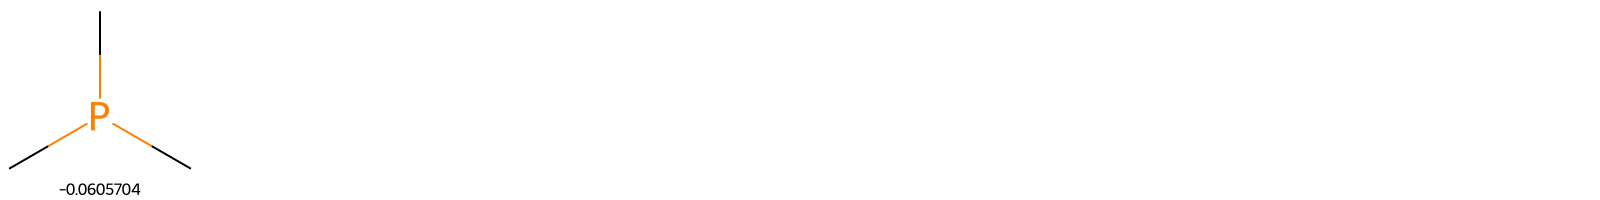

In [15]:
PandasTools.AddMoleculeColumnToFrame(df_after_threshold_x4_area2, smilesCol='SMILES')
PandasTools.FrameToGridImage(df_after_threshold_x4_area2, legendsCol="x1", molsPerRow=8)

,SMILES,ID,x1,x2,x3,x4,x5,x6,x7,x8,...,x194,x195,x196,x197,x198,x199,x200,x201,x202,ROMol
49,CC(C)(C)c1cc(P(c2cc(C(C)(C)C)cc(C(C)(C)C)c2)c2...,566,-0.053857,1.840156,-0.219751,-0.020621,-0.120186,0.199130,0.036271,0.051392,...,207.3,201.4,27.2,27.2,20,63,100,80,65,
12,Cc1ccc(P(c2ccccc2)c2ccccc2)cc1,117,-0.049994,1.860153,-0.225350,-0.027780,-0.126565,0.197570,0.040539,0.060860,...,159.1,153.8,28.2,28.2,31,23,13,61,43,
16,CC(C)(C)c1cc(P(c2cc(C(C)(C)C)cc(C(C)(C)C)c2)C2...,158,-0.057559,1.822127,-0.222296,-0.020574,-0.121435,0.201722,0.036557,0.057455,...,184.1,173.5,29.7,27.7,86,50,72,83,48,
17,CC(C)c1cc(C(C)C)c(-c2cc(-c3c(C(C)C)cc(C(C)C)cc...,159,-0.057313,1.820799,-0.233646,-0.029305,-0.131475,0.204341,0.042297,0.043611,...,198.5,185.4,30.3,27.8,41,36,13,38,11,
8,c1ccc(P(C2CCCCC2)C2CCCCC2)cc1,68,-0.059782,1.802830,-0.228121,-0.022783,-0.125452,0.205338,0.038326,0.080182,...,166.3,155.7,30.9,28.8,42,33,27,76,35,
6,c1ccc(-n2cccc2P(C2CCCCC2)C2CCCCC2)cc1,44,-0.058387,1.805810,-0.214914,-0.021870,-0.118392,0.193043,0.036309,0.075646,...,206.8,168.4,45.4,31.6,88,1,7,91,67,
44,c1ccc(-n2c(P(C3CCCCC3)C3CCCCC3)cc3ccccc32)cc1,314,-0.054117,1.820376,-0.213047,-0.027264,-0.120155,0.185783,0.038856,0.057774,...,199.5,165.8,45.9,30.9,43,1,7,83,25,
19,Cc1cc(C)cc(P(c2cc(C)cc(C)c2)C2CCCC2)c1,165,-0.057024,1.824922,-0.223751,-0.022340,-0.123046,0.201410,0.037587,0.064534,...,172.0,155.3,29.6,27.5,54,57,40,90,39,
25,CC(C)(C)c1cc(C(C)(C)C)c(-c2cc(-c3c(C(C)(C)C)cc...,176,-0.058034,1.819350,-0.233660,-0.028777,-0.131219,0.204883,0.042022,0.041558,...,196.1,184.2,31.6,30.1,11,1,3,17,5,
15,CC(C)(C)c1cc(P(c2cc(C(C)(C)C)cc(C(C)(C)C)c2)C2...,157,-0.057132,1.825000,-0.222075,-0.021239,-0.121657,0.200837,0.036851,0.057036,...,186.9,168.0,29.8,27.1,90,48,73,80,45,

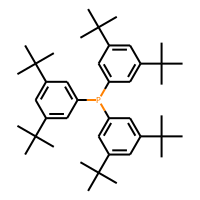
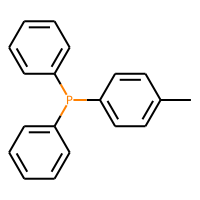
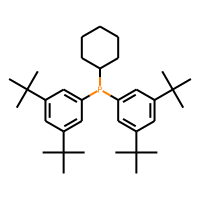
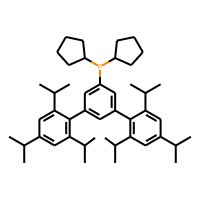
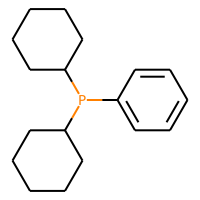
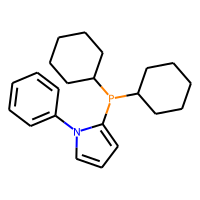
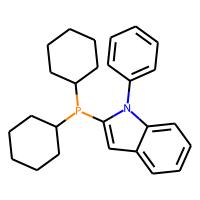
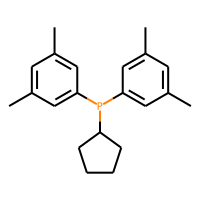
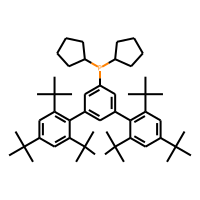
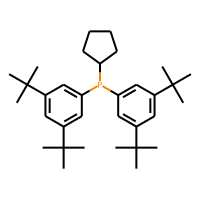
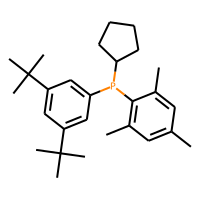
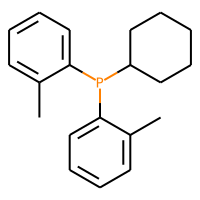
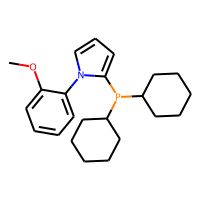
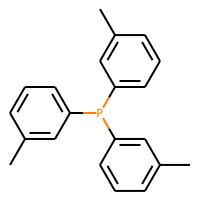
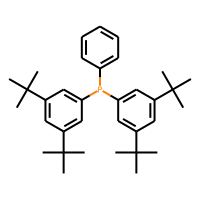
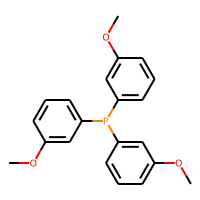
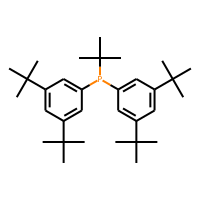
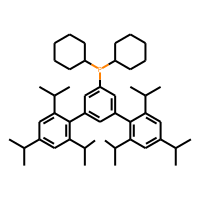
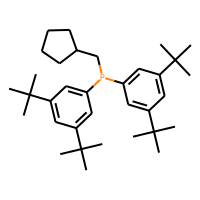
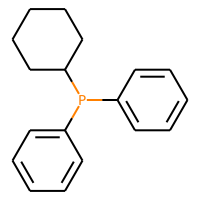
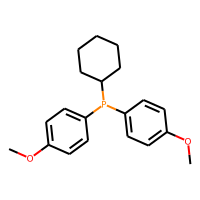
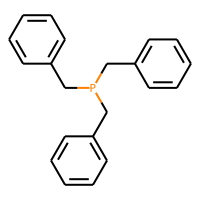
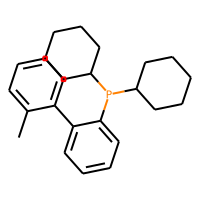
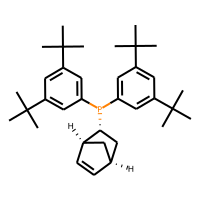

In [16]:
df_threshold_x4_area1

In [17]:
df_threshold_x4_area1.to_excel('output.xlsx')

# Correlation analysis after applying threshold x4 - area1

In [18]:
#SAVE
#df_threshold_x4_area1.to_excel('output.xlsx')
#LOAD
df_x = pd.read_excel('smc_data_catagorized.xlsx', sheet_name='Threshold_area1_TPPs ')

In [19]:
corr_matrix = df_x.corr()

In [20]:
corr_matrix["x198"].sort_values(ascending=False)

x198          1.000000
x202          0.627583
x201          0.627031
x77           0.403333
x4            0.373226
                ...   
x83          -0.387450
Unnamed: 0   -0.400272
x176         -0.411679
x122               NaN
x125               NaN
Name: x198, Length: 205, dtype: float64

In [21]:
corr_matrix["x199"].sort_values(ascending=False)

x199                 1.000000
x200                 0.865924
x77                  0.689502
x161                 0.657113
x80                  0.625172
                       ...   
179.5943800302165   -0.873632
x90                 -0.873632
x87                 -0.873632
x122                      NaN
x125                      NaN
Name: x199, Length: 205, dtype: float64

In [22]:
corr_matrix["x200"].sort_values(ascending=False)

x200    1.000000
x199    0.865924
x161    0.802331
x163    0.742923
x101    0.716909
          ...   
x90    -0.686910
x145   -0.694871
x142   -0.694871
x122         NaN
x125         NaN
Name: x200, Length: 205, dtype: float64

In [23]:
corr_matrix["x201"].sort_values(ascending=False)

x201    1.000000
x202    0.664125
x198    0.627031
x5      0.562500
x39     0.529212
          ...   
x120   -0.616988
x157   -0.631917
x109   -0.643838
x122         NaN
x125         NaN
Name: x201, Length: 205, dtype: float64

In [24]:
corr_matrix["x202"].sort_values(ascending=False)

x202    1.000000
x77     0.682173
x201    0.664125
x80     0.636726
x198    0.627583
          ...   
x79    -0.592506
x85    -0.641200
x83    -0.686792
x122         NaN
x125         NaN
Name: x202, Length: 205, dtype: float64

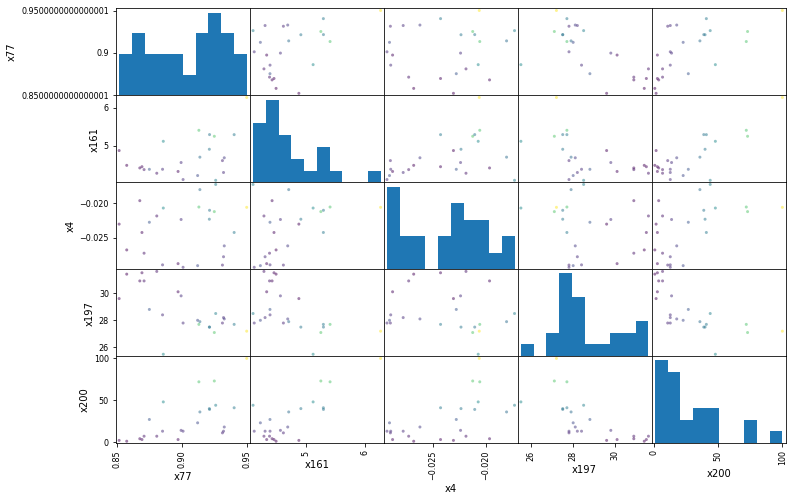

In [25]:
from pandas.plotting import scatter_matrix

attributes = ["x77", 
              "x161","x4",'x197','x200']
scatter_matrix(df_x[attributes], figsize=(12, 8),c=df_x['x200']);